In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json

In [100]:
import reader as reader
import importlib
importlib.reload(reader)

all_filenames = pd.read_csv(
    'train.csv',
    dtype=object,
    keep_default_na=False,
    na_values=[]).as_matrix()

# Parse the run config
with open("config_tissue.json") as f:
    config = json.load(f)
    
# Set up a data reader to handle the file i/o. 
reader_params = {
    'n_examples': 16,
    'example_size': [64, 64, 64],
    'extract_examples': True,
    'protocols' : config["protocols"]}

# Create a generator with the read file_references `all_filenames` and 
# `reader_params` in PREDICT mode:
it = reader.read_fn(file_references=all_filenames,
             mode=tf.estimator.ModeKeys.TRAIN,
             params=reader_params)

# If you call `next`, the `read_fn` will yield an output dictionary as designed
# by you:
ex_dict = next(it)

# Print that output dict to debug
np.set_printoptions(edgeitems=1)
print('debug')
print(ex_dict['features']['x'].shape)
print('debug')
[print(l) for l in ex_dict['labels']]
[print(ex_dict['labels'][l].shape) for l in ex_dict['labels']]

['4453610' '/vol/biobank/12579/brain/images/4453610/T1.nii.gz'
 '/vol/biobank/12579/brain/images/4453610/T1_brain_seg.nii.gz'
 '/vol/biobank/12579/brain/images/4453610/T1_first_all_fast_firstseg.nii.gz'
 '/vol/biobank/12579/brain/images/4453610/T1_brain_seg_spm.nii.gz'
 '/vol/biobank/12579/brain/images/4453610/T1_MALPEM.nii.gz'
 '/vol/biobank/12579/brain/images/4453610/T1_MALPEM_tissues.nii.gz']
debug
(64, 64, 64, 1)
debug
malp_em_tissue
spm_tissue
fsl_fast
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)


[None, None, None]

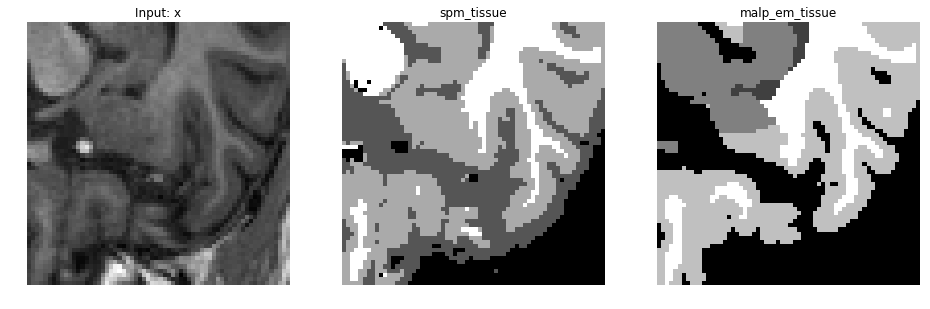

In [93]:
# We can visualise the `batch_features` using matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1, 3, figsize=(16,8))
axarr[0].imshow(np.squeeze(ex_dict['features']['x'][32, :, :, 0]), cmap='gray')
axarr[0].set_title('Input: x')
axarr[0].axis('off')

axarr[1].imshow(np.squeeze(ex_dict['labels']['spm_tissue'][32, :, :]), cmap='gray')
axarr[1].set_title('spm_tissue')
axarr[1].axis('off')

axarr[2].imshow(np.squeeze(ex_dict['labels']['malp_em_tissue'][32, :, :]), cmap='gray')
axarr[2].set_title('malp_em_tissue')
axarr[2].axis('off')

plt.show()